In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras



In [42]:
## Load Data

train_path = '/kaggle/input/cat-and-dog/training_set/training_set'
# valid_path = 'data/dogs-vs-cats/valid'
test_path = '../input/cat-and-dog/test_set/test_set'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),classes=['cats','dogs'],batch_size=10)
test=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),classes=['cats','dogs'],batch_size=10,shuffle=False)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [43]:
test.classes


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

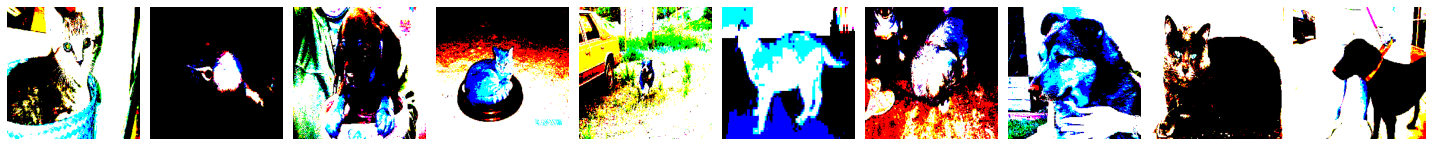

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [3]:
## Train-Batch Visualization:
import matplotlib.pyplot as plt
%matplotlib inline

imgs,label=next(train)
def plotImages(img_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(img_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(label)

In [5]:
## Loading VGG-16
vgg16=tf.keras.applications.vgg16.VGG16()
type(vgg16)
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [71]:
## Customizing VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten

# Creating New Sequential Model(to replicate Vgg16)
model=Sequential(name="Customized_Vgg16")     ## creates new model(without last 3 vgg-16 layer)
for layer in vgg16.layers[:-3]:
    model.add(layer) 

# Creating Dense layers for New-Model
for layer in model.layers:
    layer.trainable=False    # Freeze traing for old layers
#model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu'))
#model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=2,activation='softmax',name="op"))

model.summary()    

Model: "Customized_Vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)  

In [72]:
## Model Compile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

## Early Stpping
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

## Model Training
model.fit(x=train,steps_per_epoch=len(train),epochs=15,verbose=1,callbacks=[callback])


Epoch 1/15
801/801 - 35s - loss: 0.5300 - accuracy: 0.9619
Epoch 2/15
801/801 - 36s - loss: 0.0514 - accuracy: 0.9895
Epoch 3/15
801/801 - 36s - loss: 0.0403 - accuracy: 0.9941
Epoch 4/15
801/801 - 35s - loss: 0.0339 - accuracy: 0.9954
Epoch 5/15
801/801 - 36s - loss: 0.0353 - accuracy: 0.9955
Epoch 6/15
801/801 - 35s - loss: 0.0250 - accuracy: 0.9978
Epoch 7/15
801/801 - 36s - loss: 0.0254 - accuracy: 0.9968
Epoch 8/15
801/801 - 35s - loss: 0.0361 - accuracy: 0.9968
Epoch 9/15
801/801 - 35s - loss: 0.0374 - accuracy: 0.9968


In [73]:
## Prediction
pred=model.predict(x=test,steps=len(test),verbose=0)
pred

array([[1.0000000e+00, 0.0000000e+00],
       [9.9999857e-01, 1.4530893e-06],
       [1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0989420e-17, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [74]:
## Confussion-Matrix
confusion_matrix(test.classes,y_pred=np.argmax(pred,axis=1))

array([[993,  18],
       [ 27, 985]])

In [ ]:
# 54
# 42
# 35